In [11]:
import cv2
from skimage import color

import numpy as np

In [6]:
image = cv2.imread('/Users/kristianeschenburg/Desktop/flower.jpg')
gray = color.rgb2gray(image)

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

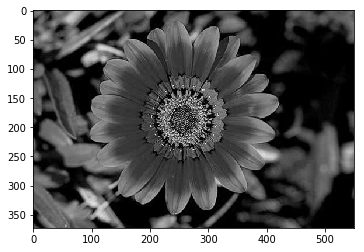

In [10]:
plt.imshow(gray, cmap='gray')

In [12]:
fs = np.fft.fft2(gray)
fs_s = np.fft.fftshift(fs)

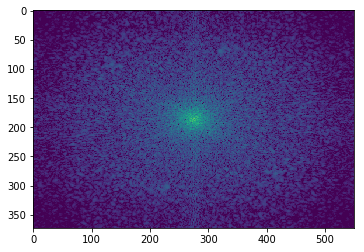

In [15]:
plt.imshow(np.abs(fs_s),norm=LogNorm(vmin=5))

In [18]:
import os
os.chdir('/Users/kristianeschenburg/Documents/Code/DeepImageRecon/')

In [19]:
import pandas as pd

In [24]:
df = pd.read_table('./data/prefiltered_func_data_mcf.par',sep='\s+',names=['xrad','yrad','zrad','xshift','yshift','zshift'])

In [26]:
os.chdir('./synthetics/')

In [ ]:
from importlib import reload

In [67]:
import utilities as utl
import plots

reload(utl)

<module 'utilities' from '/Users/kristianeschenburg/Documents/Code/DeepImageRecon/synthetics/utilities.py'>

In [120]:
import nibabel as nb

In [126]:
t1 = nb.load('/Users/kristianeschenburg/Desktop/Research/Data/Structural/285345.T1w_restore_brain.nii.gz')
data = t1.get_data()
print(data.shape)

img = data[:,:,130]

(260, 311, 260)


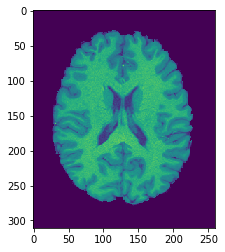

In [128]:
img = np.flipud(img.T)
plt.imshow(img)

In [136]:
[n,p] = img.shape
order = utl.kspace_trajectory(n, p)

[xmotion, ymotion] = utl.sample_motion(25, order, df, img, xweight=25, yweight=25)

xinds = np.where(xmotion)[0]
yinds = np.where(ymotion)[0]

[motion, motion_fft] = utl.fourier_shift(signal=img, order=order, shiftx=xmotion, shifty=ymotion, xinds=xinds, yinds=yinds)

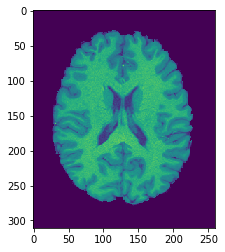

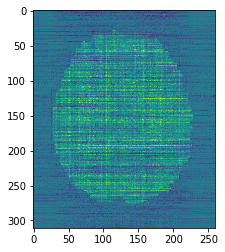

In [137]:
plt.imshow(motion)
plt.show()

difference = img-motion
plt.imshow(difference)
plt.show()